In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from gradientOptimization.goptimization import optimizationMethods, optimizationFunctionFactory, VectorD

# Basic Analysis of State Dependent Gradient Descent

In this notebook we are going to experiment a little with the proposed state dependent gradient descent method. Let us start by looking at some of the funcitons. Here is the basic plotting routine.

In [17]:
from enum import Enum
from typing import Callable, List

class typeOfPlot(Enum):
    Surface = 0, 
    Contour = 1, 
    Both = 2

def box_surface_2d_tourch( init: List[float], 
                           end: List[float], 
                           step: float, 
                           functor: Callable[[VectorD],float], 
                           figsize = (16,8), 
                           cmap = cm.coolwarm, 
                           type_of_plot = typeOfPlot.Both ):
    
    X = np.arange(init[0], end[0], step[0])
    Y = np.arange(init[1], end[1], step[1])
    X, Y = np.meshgrid(X, Y)
    Z = functor( torch.tensor([X,Y]) )
    
    if type_of_plot in [typeOfPlot.Both, typeOfPlot.Surface]:
        # Plot the surface.
        plt.figure(figsize = figsize )
        ax = plt.subplot('121', projection = '3d')
        surf = ax.plot_surface(X, Y, Z.numpy(), cmap = cmap )
    
    if type_of_plot in [typeOfPlot.Both, typeOfPlot.Contour]:
        ax = plt.subplot('122')
        CS = ax.contour(X, Y, Z, cmap = cmap )
        plt.show()

To get the funcitons, we need to call the factory passing the function name as a string. This functor has an overwriten callable function, which means it can be called as if it was a simple funciton. As an example, we do the plot taking 200 samples per dimension, spaced unifromly on the box $[-1,1]\times[1,1]$ of the ackley funciton. We also plot the contour funciton next to it for better reference.

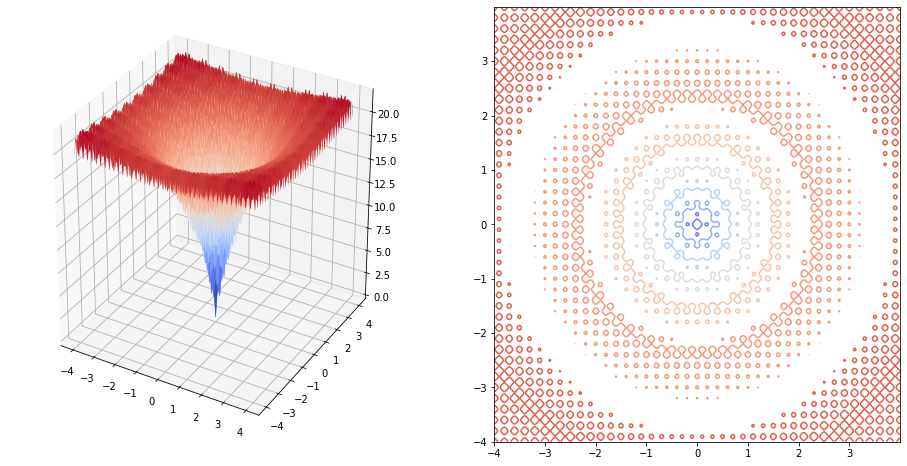

In [18]:
ackley = optimizationFunctionFactory.create("ackley") 
box_surface_2d_tourch( [-4,-4], [4,4], [0.0025, 0.0025], ackley )

Also, adding a couple of zooms to better see, how the funciton looks like close to its absolute minimum and far from it. 

Observe how, when we are far, there is a lot of seemly equal local minimums, such that we can get stuck in any of them with the traditional gradient descent. This is one of the motivations for adding noise to the gradient evolution.  

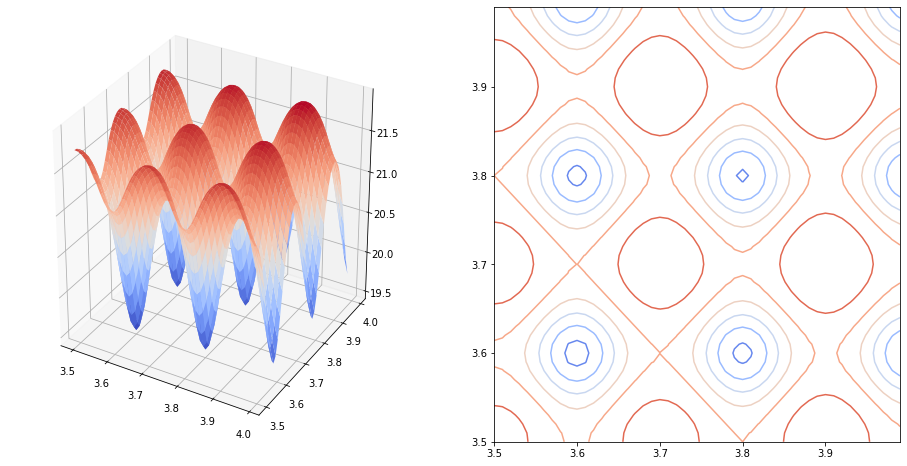

In [19]:
box_surface_2d_tourch( [3.5,3.5], [4,4], [0.01, 0.01], ackley )

When we are closer to the minimum the rugged surface does have a tendency towards the minimum. Here is where the noisy method can get the most advantage.

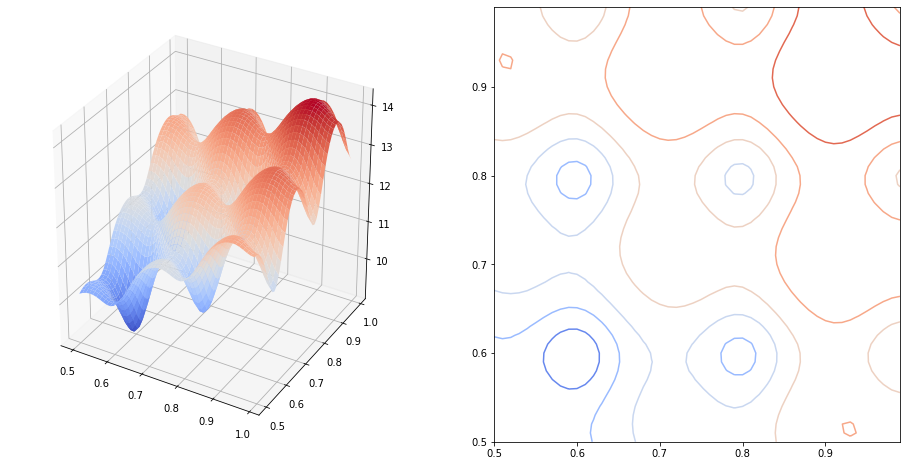

In [20]:
box_surface_2d_tourch( [0.5,0.5], [1,1], [0.01, 0.01], ackley )

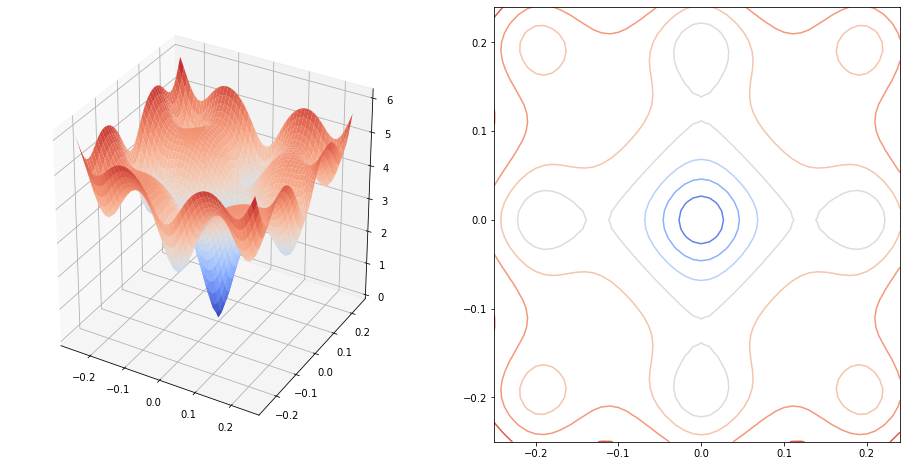

In [21]:
box_surface_2d_tourch( [-0.25,-0.25], [0.25,0.25], [0.01, 0.01], ackley )

## Analysis of the Algorithms

We will do analysis for the different algorithms when starting in a far away point. To be specific, we have set our infrastructure to pick a uniformly random point unifrom on the square $\mathcal{S}_{far} = [3.9,4.0]\times[3.9,4.0]$. For all the algorithms we choose the same random point in order to have a fair comparison. The choice for this set is driven mainly from the exploratory analysis done before. An are far from the origin, seems to be were a lot of similar local minima are, making it hard for the algorithms to find the global minima. 

### Gradient Descent

The starting point of our analysis will be the standard gradient descent. In this case, if $U:\mathbb{R}^d \mapsto \mathbb{R}$ is the funciton to be optimized, then the steps taken by the algorithm are $$x_{t+1} = x_t - \eta \nabla U(x_t),\quad t \geq 1, $$
with initial condition $x_0$. The number $\eta >0$ is known as the learning rate, and will be left constant through the evolution of the optimizer. In this and all the optimizers, we will set $\eta = 1$. Also, we will run the simulation for 1000 steps.

Let us first, create a general optimization object in the line below with all the fixed execution parameters. 

In [22]:
eta = 0.01
epochs = 1
steps = 1000

In [23]:
gopt = optimizationMethods(ackley)

Now, we are going to run the gradient descent method with the verbose flag on and the model set to IMPROVEMENTS. With these options the program will print whenever a new minumum has been reached. Recall that the seed is set by default for fairness of comparison. 

In [25]:
torch.manual_seed(0)
res = gopt.gradient_descent( eta, epochs, steps)

iteration  0 , x  [3.9496257305145264, 3.9768221378326416] , y  20.894397735595703
iteration  6 , x  [4.235530376434326, 4.189486503601074] , y  20.423383712768555
iteration  16 , x  [4.17361307144165, 3.787287712097168] , y  20.124345779418945
iteration  33 , x  [5.3972673416137695, 4.196927070617676] , y  19.852296829223633
